## Counting Point Mutations

In [32]:
s = 'GAGCCTACTAACGGGAT'
t = 'CATCGTAATGACGGCCT'

In [26]:
mutation_counts=0
for A,B in zip(s,t):
    if A == B:
        continue
    else:
        mutation_counts += 1

In [27]:
mutation_counts

7

In [34]:
def mutation_counts(s,t):
    counts=0
    for A,B in zip(s,t):
        if A == B:
            continue
        else:
            counts += 1
    return counts

In [35]:
mutation_counts(s,t)

7

### Apply to data

In [46]:
with open("./data/rosalind_hamm.txt",'r') as f:
    s = next(f)
    t = next(f)

In [47]:
len(s)

932

In [48]:
len(t)

932

In [49]:
mutation_counts(s,t)

463

## Mendel's First Law

In [78]:
k = 2 ## AA
m = 2 ## Aa
n = 2 ## aa
sums = k+m+n

In [1]:
import numpy as np
import math
from itertools import combinations,permutations

In [103]:
# AA
# P(AA|AA) + P(AA|Aa) *1/2+ P(Aa|Aa)*1/4 + P(aa|aa)*0
# Aa
# P(AA|Aa)*1/2 + P(AA|aa) +P(Aa|Aa)*3/4
# aa
# P(Aa|Aa)*1/4 + P(aa|aa) + P_Aa_aa

In [85]:
sum_comb = math.comb(sums,2)
sum_comb

15

In [91]:
P_AA_AA = math.comb(k,2)/sum_comb
P_aa_aa = math.comb(n,2)/sum_comb
P_Aa_Aa = math.comb(m,2)/sum_comb
P_AA_Aa = k*m/sum_comb
P_AA_aa = k*n/sum_comb
P_Aa_aa = m*n/sum_comb

In [92]:
P_AA_AA+P_aa_aa+P_Aa_Aa+P_AA_Aa+P_AA_aa+P_Aa_aa

1.0

In [98]:
P_AA = P_AA_AA+P_AA_Aa*1/2+P_Aa_Aa*1/4
P_Aa = P_AA_Aa*1/2 + P_AA_aa +P_Aa_Aa*3/4

In [99]:
P_AA+P_Aa

0.6666666666666667

In [100]:
P_aa = P_Aa_Aa*1/4 + P_aa_aa + P_Aa_aa*1/2

In [102]:
1-P_aa

0.7833333333333333

### Apply to data

In [104]:
k = 29 ## AA
m = 18 ## Aa
n = 26 ## aa
sum = k+m+n

sum_comb = math.comb(sum,2)
P_AA_AA = math.comb(k,2)/sum_comb
P_aa_aa = math.comb(n,2)/sum_comb
P_Aa_Aa = math.comb(m,2)/sum_comb
P_AA_Aa = k*m/sum_comb
P_AA_aa = k*n/sum_comb
P_Aa_aa = m*n/sum_comb

In [105]:
P_aa = P_Aa_Aa*1/4 + P_aa_aa + P_Aa_aa*1/2

In [106]:
1- P_aa

0.7727359208523592

## Translating RNA into Protein

In [110]:
sample = 'AUGGCCAUGGCGCCCAGAACUGAGAUCAAUAGUACCCGUAUUAACGGGUGA'
out = 'MAMAPRTEINSTRING'

In [111]:
len(sample),len(out)

(51, 16)

In [109]:
len(sample)/3

17.0

In [112]:
# stop_codon =['UAA','UAG','UGA']

In [130]:
codon_table = {
    "UUU": "F", "CUU": "L", "AUU": "I", "GUU": "V",
    "UUC": "F", "CUC": "L", "AUC": "I", "GUC": "V",
    "UUA": "L", "CUA": "L", "AUA": "I", "GUA": "V",
    "UUG": "L", "CUG": "L", "AUG": "M", "GUG": "V",
    "UCU": "S", "CCU": "P", "ACU": "T", "GCU": "A",
    "UCC": "S", "CCC": "P", "ACC": "T", "GCC": "A",
    "UCA": "S", "CCA": "P", "ACA": "T", "GCA": "A",
    "UCG": "S", "CCG": "P", "ACG": "T", "GCG": "A",
    "UAU": "Y", "CAU": "H", "AAU": "N", "GAU": "D",
    "UAC": "Y", "CAC": "H", "AAC": "N", "GAC": "D",
    "UAA": "Stop", "CAA": "Q", "AAA": "K", "GAA": "E",
    "UAG": "Stop", "CAG": "Q", "AAG": "K", "GAG": "E",
    "UGU": "C", "CGU": "R", "AGU": "S", "GGU": "G",
    "UGC": "C", "CGC": "R", "AGC": "S", "GGC": "G",
    "UGA": "Stop", "CGA": "R", "AGA": "R", "GGA": "G",
    "UGG": "W", "CGG": "R", "AGG": "R", "GGG": "G"
}

In [132]:
data = sample
filter = 3
words= [data[num:num+filter]for num in range(0,len(sample),filter)]

In [133]:
len(words)

17

In [146]:
paragraph = [codon_table[word] for word in words if codon_table[word] != 'Stop']

In [147]:
"".join(paragraph)

'MAMAPRTEINSTRING'

### apply to data

In [150]:
with open('./data/rosalind_prot.txt','r') as f:
    data = f.read()
data = data.rstrip()

In [152]:
filter = 3
words= [data[num:num+filter]for num in range(0,len(data),filter)]
paragraph = [codon_table[word] for word in words if codon_table[word] != 'Stop']
"".join(paragraph)

'MVPLTSLVPLCPDTGLVCYATTADGSIRPRLQALGAAVSRSCMILENAVHGSAEWSLTGLPPQAVLLAQYLKFYQTEVRVHRSYRSGEQVFPSHDGSNHVLPFRGHITGVTLVIVSSVNYYSRVCATTDAPSGEAVNNPVGGSSLLEAHADTVIRNGIRSVEINCRVPGVRGDILVPSVLENTVHVDDSPRPYSRRYNSQHSCFGLASWRQVESSAHHCHGNEWVRTGIVKEYSRRTRISSSNSRRERDSLRSYAHLREVRRAPYCGTVATTKDLQTRLPEGSQCVPNSHQPYTDTGTASVNNAWLVAMPSRHLMFCSQMVLSNHFEHPDISRRMRTRDLSFRGRAFVYSVTPQFKINAMASPCRYLEENINFSKSRNVPKQFTGGDDKILRIVDASCAPLYLMGRASRINSTFMGCTPLKPPKCLTLYPRTGIRITVGCITTTWASPPGAGRVGLRLAQDAAIINLAGRDKIVNRSMVMEMERHAQALAATHSLAGLLKESSTTTTLSVWRPIIDSILSDHYVTLLLCIHTIVTMLDGQQADNAINAHFLATAMSPRRPLLLHPLLQHKNITDIDRSDISATRTLDLKTLKIMLMSALDGGFMPNRNPQNIEGKRDGYFILLRFTEAGGGAVYVIGYFKWPGHLRPTNVAQHVADCSLGVFATPSARVGAGKGILFRKVVSTTSDAVMEFNSSTVKYPPKFPAGRAQLVALRIYSIGQYKTTPQRIAEVHSIFRSFPFREEGCAIGLEVWTTISQSHVSATHSYVYLISTLWGGAHIKFPLDECRSAKSGIQVLETRINATVSCKGPVGGYDVVVMESRVTPSGASIADVKYRSWKVVAPVTPEGPAHKRTFHYKILRRWTSGEVCKQFTWRRLMALGWRTVNPTDIVPSSNEYDPYRRYTLLEWWSTFMKLSLNCGQALFGGKRDLNNVCSPKVYLLRAVPCGRDRKPTMEDGRRKWKVSTTQPTVVWVNYPYRVTLRCNMVQFPSCSRLPYFILWL

## Finding a Motif in DNA

In [212]:
s = 'GATATATGCATATACTT'
t = 'ATAT'

In [213]:
len(t),len(s)

(4, 17)

In [214]:
S = s
T = t
counter = []
for num in range(len(S)):
    seq = S[num:num+len(t)]
    if t == seq:
        counter.append(num+1)

In [215]:
counter

[2, 4, 10]

### Apply to Data

In [216]:
def found_seq(target, sequence):
    counter = []
    for num in range(len(sequence)):
        seq = sequence[num:num+len(target)]
        if target == seq:
            counter.append(num+1)
    return counter

In [217]:
found_seq(t,s)

[2, 4, 10]

In [225]:
with open('./data/rosalind_subs.txt','r') as f:
    sequence = next(f).rstrip()
    target = next(f).rstrip()

In [226]:
sequence

'ACAGTTTTGCAGTTTTACCCCCCCAGTTTTGCCTCAGTTTTCAGTTTTTCAGTTTTCAGTTTTGGCAGTTTTCCAGTTTTCGGGCAGTTTTGCTATACAGTTTTCGGGACCAGTTTTCAGTTTTAGCTTACGGTCCAGTTTTCGGCAGTTTTCGCAGTTTTTCAGTTTTCAGTTTTACAGTTTTTCAGTTTTCGGCGCAGTTTTCCACAGTTTTGCAGTTTTCCCAGTTTTACAGTTTTGTCAGTTTTCAGTTTTTCAGTTTTATGCCGGGTTTCAGTTTTCAGTTTTGTGACCAAACGCCAGTTTTGCAGTTTTCTGCAGTTTTCAGTTTTACAGTTTTCCAGTTTTATCAGTTTTGTGTACAGTTTTCCAGTTTTCAGTTTTCAGTTTTAGAGTGCCGCTCAGTTTTAGGATGCCAGTTTTCCACAGTTTTGTCCGTCAGTTTTCAGTTTTTTCTCAGTTTTAAATCCAGTTTTTTCAGTTTTCAGTTTTCCAGTTTTCAGTTTTAGCTTTTCAGTTTTACACAGTTTTCCGGCAGTTTTACCAGTTTTCGTCCAGTTTTGCAGTTTTCCAGTTTTGTACAGTTTTCCAGTTTTCGACAGTTTTAGAGTCAGTTTTTACCCTGCGCACAGTTTTCCAGTTTTGCAGTTTTCAGTTTTCTGGCAGTTTTCGCAGTTTTTCAGTTTTACAGTTTTGGCAGTTTTCAGTTTTACAGTTTTTTCAGTTTTTACAGTTTTAAGAGGTCAGTTTTCGGGACAGTTTTAGCAGTTTTTCCATTTCAGTTTTCGTACAGTTTTCAGTTTTTCAGTTTTGCAGTTTTGGCAGTTTTGAATTCAGTTTTACAGTTTTATTCAGTTTTGCAGTTTT'

In [227]:
target

'CAGTTTTCA'

In [228]:
substring = found_seq(target=target,sequence=sequence)

In [229]:
found = []
last = 0
while True:
    pos = sequence.find(target,last)
    if pos == -1:
        break
    found.append(pos+1)
    last = pos+1

In [230]:
print(*found)

35 50 111 163 242 275 319 371 378 440 479 494 646 698 791


In [231]:
print(*substring)

35 50 111 163 242 275 319 371 378 440 479 494 646 698 791


## Consensus and Profile 

In [232]:
import numpy as np

In [2]:
from Bio import SeqIO

In [289]:
sequence = SeqIO.parse("./data/test/rosalind_matrix.fa.txt",'fasta')
seq_dict = {}
for i in sequence:
    seq_dict[i.id] = [str(i.seq)]
    print(len(i.seq))

8
8
8
8
8
8
8


In [331]:
length=8
A = np.zeros([length])
C = np.zeros([length])
G = np.zeros([length])
T = np.zeros([length])

In [332]:
for words in seq_dict.values():
    for j,word in enumerate(words[0]):
        if word == 'A':
            A[j] += 1
        elif word == 'C':
            C[j] += 1
        elif word == 'G':
            G[j] += 1
        elif word == 'T':
            T[j] += 1
matrix = np.array([A,C,G,T],dtype=int)
max_idx = np.argmax(matrix,axis=0)
keys = {0:'A',1:'C',2:'G',3:'T'}

print(''.join([keys[idx] for idx in max_idx ]))
print(f"A: {matrix[0]}")
print(f'C: {matrix[1]}')
print(f'G: {matrix[2]}')
print(f'T: {matrix[3]}')

ATGCAACT
A: [5 1 0 0 5 5 0 0]
C: [0 0 1 4 2 0 6 1]
G: [1 1 6 3 0 1 0 0]
T: [1 5 0 0 0 1 1 6]


### Apply to data

In [369]:
sequence = SeqIO.parse("./data/rosalind_cons.txt",'fasta')
seq_dict = {}
for i in sequence:
    seq_dict[i.id] = [str(i.seq)]

length=len(i.seq)
A = np.zeros([length])
C = np.zeros([length])
G = np.zeros([length])
T = np.zeros([length])

for words in seq_dict.values():
    for j,word in enumerate(words[0]):
        if word == 'A':
            A[j] += 1
        elif word == 'C':
            C[j] += 1
        elif word == 'G':
            G[j] += 1
        elif word == 'T':
            T[j] += 1
matrix = np.array([A,C,G,T],dtype=int)
max_idx = np.argmax(matrix,axis=0)
keys = {0:'A',1:'C',2:'G',3:'T'}
A = ' '.join(str(x) for x in matrix[0].flatten())
C =' '.join(str(x) for x in matrix[1].flatten())
G = ' '.join(str(x) for x in matrix[2].flatten())
T =' '.join(str(x) for x in matrix[3].flatten())


with open('cons.txt','w') as file:
    file.write(''.join([keys[idx] for idx in max_idx]))
    file.write(f"A: {A}\n")
    file.write(f"C: {C}\n")
    file.write(f"G: {G}\n")
    file.write(f"T: {T}")

## Mortal Fibonacci Rabbits

In [543]:
n = 6
m = 3
fibo = [1,1]
months = 2
while months <n :
    if months < m:
        fibo.append(fibo[-2]+fibo[-1])
    elif months == m:
        fibo.append(fibo[-2]+fibo[-1]-1)
    else:
        fibo.append(fibo[-2]+fibo[-1]-fibo[-(m+1)])
    months +=1

In [545]:
fibo[-1]

4

### Apply to data

In [548]:
n =81
m = 17
fibo = [1,1]
months = 2
while months <n :
    if months < m:
        fibo.append(fibo[-2]+fibo[-1])
    elif months == m:
        fibo.append(fibo[-2]+fibo[-1]-1)
    else:
        fibo.append(fibo[-2]+fibo[-1]-fibo[-(m+1)])
    months +=1

In [549]:
fibo[-1]

37577591247583251

## Overlap Graphs

In [569]:
sequence = SeqIO.parse("./data/test/rosalind_graph_test.txt",'fasta')
seq_dict = {}
for i in sequence:
    seq_dict[i.id] = str(i.seq)

In [570]:
seq_dict

{'Rosalind_0498': 'AAATAAA',
 'Rosalind_2391': 'AAATTTT',
 'Rosalind_2323': 'TTTTCCC',
 'Rosalind_0442': 'AAATCCC',
 'Rosalind_5013': 'GGGTGGG'}

- 前後3つを抽出->一致するものとのtupleを返す

In [577]:
seqs = list(seq_dict.values())
ids = list(seq_dict.keys())

In [582]:
edges = []
for id,seq in zip(ids,seqs):
    head = seq[:3]
    tail = seq[-3:]
    # 対象seqのtailと一致するものを作成
    for i,j in zip(seqs,ids):
        if seq == i:
            continue
        elif tail == i[:3]:
            if (id,j) not in edges:
                edges.append((id,j))
    for i,j in zip(seqs,ids):
        if seq == i:
            continue
        elif head == i[-3:]:
            if (j,id) not in edges:
                edges.append((j,id))

In [583]:
edges

[('Rosalind_0498', 'Rosalind_2391'),
 ('Rosalind_0498', 'Rosalind_0442'),
 ('Rosalind_2391', 'Rosalind_2323')]

### Apply to data

In [591]:
sequence = SeqIO.parse("./data/rosalind_grph.txt",'fasta')
seq_dict = {}
for i in sequence:
    seq_dict[i.id] = str(i.seq)

edges = []
for id, seq in seq_dict.items():
    head, tail = seq[:3], seq[-3:]
    # 対象seqのtailとheadが一致するものを検索
    for other_id, other_seq in seq_dict.items():
        if id == other_id:  # 自分自身との比較をスキップ
            continue
        if tail == other_seq[:3] and (id, other_id) not in edges:
            edges.append((id, other_id))
        elif head == other_seq[-3:] and (other_id, id) not in edges:
            edges.append((other_id, id))

In [592]:
for i in edges:
    print(i[0], i[1])

Rosalind_6654 Rosalind_9095
Rosalind_6654 Rosalind_9534
Rosalind_8251 Rosalind_3102
Rosalind_3102 Rosalind_9660
Rosalind_3102 Rosalind_4000
Rosalind_2439 Rosalind_4335
Rosalind_6514 Rosalind_4335
Rosalind_4335 Rosalind_5289
Rosalind_4157 Rosalind_4335
Rosalind_4335 Rosalind_6674
Rosalind_2439 Rosalind_1798
Rosalind_2439 Rosalind_0519
Rosalind_8131 Rosalind_6076
Rosalind_6076 Rosalind_0857
Rosalind_6076 Rosalind_2491
Rosalind_3943 Rosalind_6076
Rosalind_9011 Rosalind_5647
Rosalind_7630 Rosalind_5647
Rosalind_4131 Rosalind_7742
Rosalind_0340 Rosalind_8725
Rosalind_8725 Rosalind_0896
Rosalind_0857 Rosalind_6313
Rosalind_3395 Rosalind_6313
Rosalind_4832 Rosalind_8131
Rosalind_8131 Rosalind_4277
Rosalind_8131 Rosalind_9984
Rosalind_8131 Rosalind_6716
Rosalind_8131 Rosalind_4625
Rosalind_4895 Rosalind_0033
Rosalind_4895 Rosalind_8731
Rosalind_4131 Rosalind_4895
Rosalind_5238 Rosalind_7772
Rosalind_0069 Rosalind_7772
Rosalind_2491 Rosalind_7772
Rosalind_7772 Rosalind_1585
Rosalind_7772 Rosali

In [599]:
import networkx as nx
import matplotlib.pyplot as plt

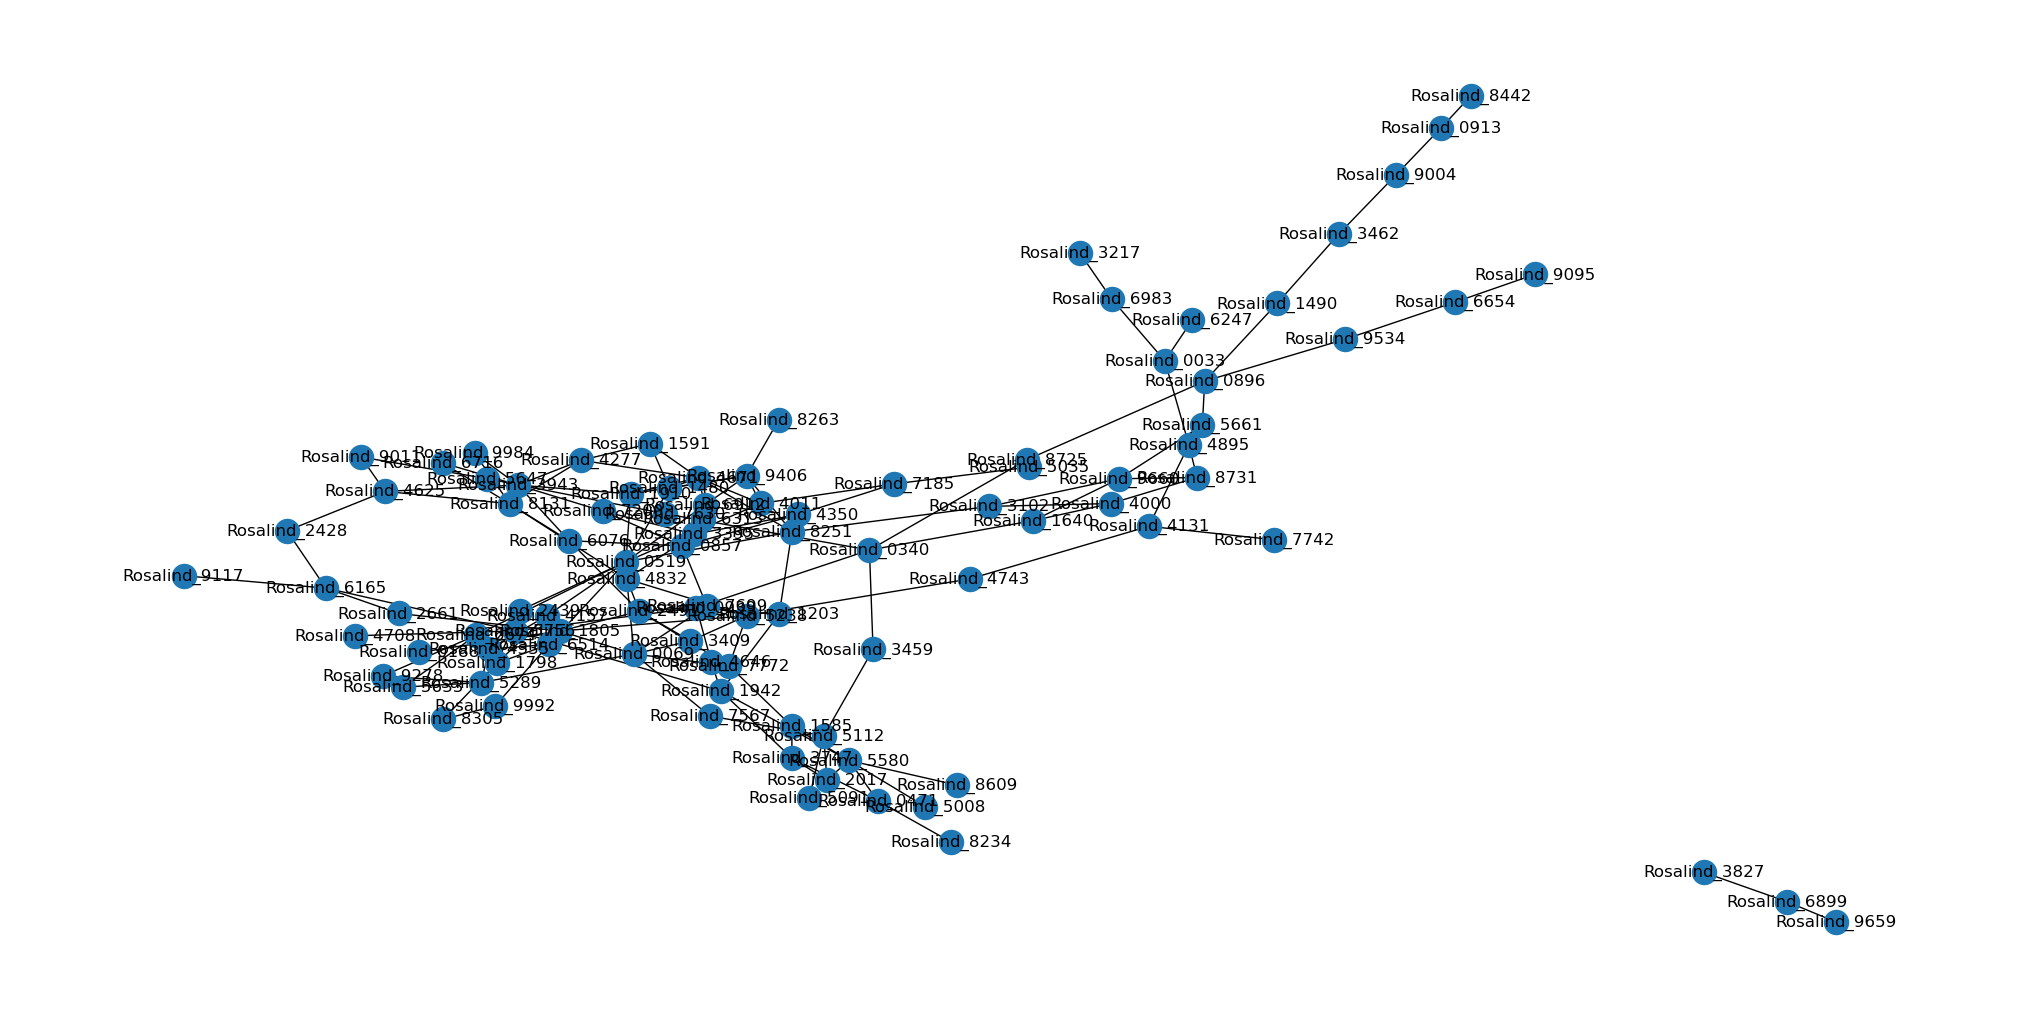

In [608]:
G = nx.Graph()

G.add_edges_from(edges)

plt.figure(figsize=(20,10))
nx.draw(G,with_labels=True)

## Calculating Expected Offspring

- P(A) = P(A|AA-AA) + P(A|AA-aa) +P(A|AA-Aa) + P(A|Aa-Aa) + P(A|Aa-aa)
- = P(AA-AA) + P(AA-Aa) + P(AA-aa) + 3/4*P(Aa-Aa) + 1/2*P(Aa-aa)

In [3]:
expected = 2*1 + 0 + 0 + 2*3/4  
expected

3.5

In [16]:
with open('./data/test/rosalind_expected.txt','r') as f:
    data = f.read().rstrip()

In [23]:
[int(x) for x in data.split(' ')]

[1, 0, 0, 1, 0, 1]

In [19]:
def check_expected(nums):
    expected = (2*nums[0] + 2*nums[1] + 2*nums[2] + 2*3/4*nums[3] + 2*1/2 *nums[4])
    return expected

In [20]:
check_expected(data)

TypeError: can't multiply sequence by non-int of type 'float'

### Apply to Data

In [26]:
with open('./data/rosalind_iev.txt','r') as f:
    data = f.read().rstrip()
data = [int(x) for x in data.split(' ')]
print(data)
check_expected(data)

[18062, 17625, 17786, 19720, 19243, 16783]


155769.0

## Finding a Shared Motif

In [113]:
# data prep
f = SeqIO.parse('./data/test/rosalind_sharedmotif.txt','fasta') 
seq_dict = {}
for i in f:
    seq_dict[i.id] = str(i.seq)

In [114]:
## shortest sequence
shortest_id = min(seq_dict,key=lambda x: len(seq_dict[x]))
shortest_seq = seq_dict[shortest_id]

common_substring=[]
# find k-mer
for start in range(len(shortest_seq)):
    for end in range(start+1,len(shortest_seq)):
        kmer = shortest_seq[start:end]
        if len(kmer) == 1:
            continue
        else:
            seq_values = list(seq_dict.values())
            if all(kmer in seq for seq in seq_values):
                common_substring.append(kmer)

sorted(common_substring,key=len,reverse=True)

['TA', 'AC']

### Apply to data

In [110]:
# data prep
f = SeqIO.parse('./data/rosalind_lcsm.txt','fasta') 
seq_dict = {}
for i in f:
    seq_dict[i.id] = str(i.seq)
## shortest sequence
shortest_id = min(seq_dict,key=lambda x: len(seq_dict[x]))
shortest_seq = seq_dict[shortest_id]

common_substring=[]
# find k-mer
for start in range(len(shortest_seq)):
    for end in range(start+1,len(shortest_seq)):
        kmer = shortest_seq[start:end]
        if len(kmer) == 1:
            continue
        else:
            seq_values = list(seq_dict.values())
            if all(kmer in seq for seq in seq_values):
                common_substring.append(kmer)

sorted(common_substring,key=len,reverse=True)[0]

'ATACTCCGTTCATGAGGAGTCTCACCAAGAATTG'

## Mendel's Second Law

- f0は AAbb * aaBB
- f1はAaBbのみ
- AaBb同士からは6/16の確率でAaBb

In [115]:
6/16

0.375

In [ ]:
k = 2
N = 1
probability = 0

for i in range(N):
    prob = ()